<a href="https://colab.research.google.com/github/innocentmatutu/Machine-learning/blob/main/Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch



from torch import nn

#Import torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#Import matplotlib for visualization
import matplotlib.pyplot as plt

In [2]:
#Setup training data
train_data = datasets.FashionMNIST(
    root='data', #Where to download data to
    train=True, #Do we want the training set
    download=True, #Do we want to download it
    transform=torchvision.transforms.ToTensor(),
    target_transform=None #how do we want to transfomr the labels
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 212kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.91MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 26.1MB/s]


In [3]:
#see the first training example
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
image.shape, label
print(f'Image shape: {image.shape}')
print(f'Image label: {class_names[label]}')

Image shape: torch.Size([1, 28, 28])
Image label: Ankle boot


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

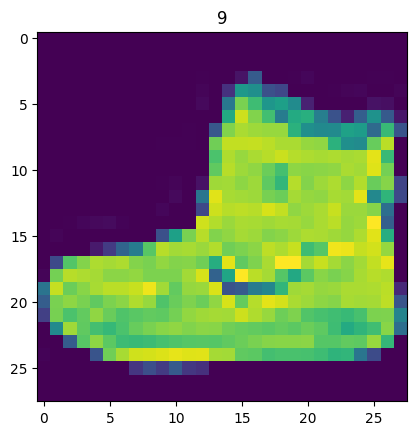

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

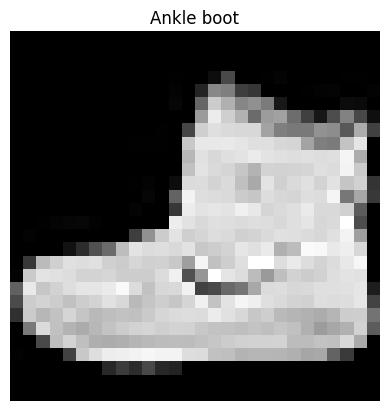

In [8]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

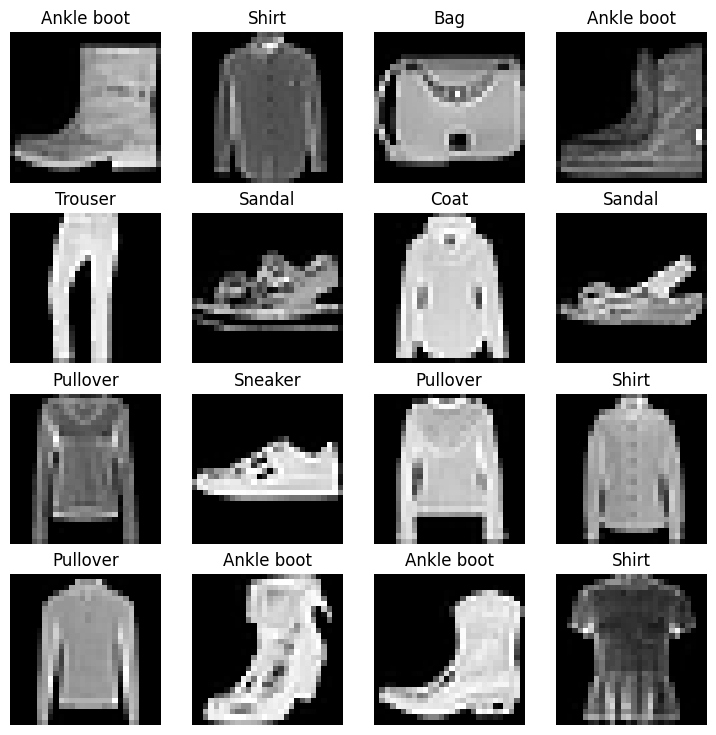

In [9]:
#Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)


In [10]:
from torch.utils.data import DataLoader

#Setup the batch size hyperparameter
BATCH_SIZE = 32

#Turn datasets into iterable(batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_data

(<torch.utils.data.dataloader.DataLoader at 0x79168eb24710>,
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [11]:
#Let's check out what we have created
print(f'DataLoader: {train_dataloader, test_dataloader}')
print(f'Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x79168eb24710>, <torch.utils.data.dataloader.DataLoader object at 0x79168ed3ba10>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [12]:
#Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


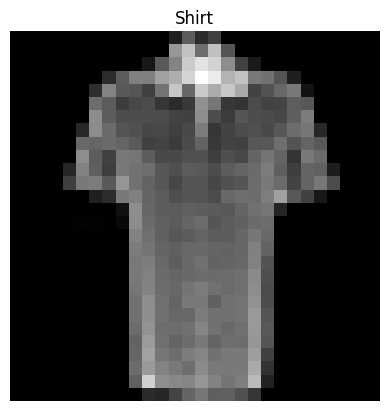

In [13]:
#Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

In [14]:
#create a flatten layer
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]

#Flatten the sample
output = flatten_model(x) #Perform forward pass

#Print out what happened
print(f'Shape before flattening: {x.shape}')
print(f'Shape after flattening: {output.shape}')

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [15]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)

    )

  def forward(self,x):
    return self.layer_stack(x)

In [16]:
torch.manual_seed(42)

#Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [18]:
import requests
from pathlib import Path

#Download helper functions form learn pytorch repo
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists,skipping download...')
else:
  print('Downloading helper_functions.py')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py",'wb') as f:
    f.write(request.content)

In [19]:
#import accurcy metric
from helper_functions import accuracy_fn

#Setup loss function and optmizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [20]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  total_time = end-start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

In [21]:
start_time = timer()

end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


2.926999999885993e-05

In [22]:
#Import tqdm for progress bar
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#Set the number of epochs
epochs = 3

#Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n----')
  #Training
  train_loss = 0
  #Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #Forward pass
    y_pred = model_0(X)

    #Calculate loss(per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss

    #Optimizer zero grad
    optimizer.zero_grad()

    #Loss backward
    loss.backward()

    #Optimizer step
    optimizer.step()

    #Print out what's happening
    if batch % 400 == 0:
      print(f'Looked  at {batch * len(X)/len({train_dataloader.dataset})} samples')

  #Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  #Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #Forward pass
      test_pred = model_0(X_test)

      #Calculate loss(accumalatively)
      test_loss += loss_fn(test_pred, y_test)

      #Calcualte accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    #Calcualte the test loss average per batch
    test_loss /= len(test_dataloader)

    #Calcualte the test acc average per batch
    test_acc /= len(test_dataloader)
  #Print out what's happening
  print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

#calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked  at 0.0 samples
Looked  at 12800.0 samples
Looked  at 25600.0 samples
Looked  at 38400.0 samples
Looked  at 51200.0 samples

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
----
Looked  at 0.0 samples
Looked  at 12800.0 samples
Looked  at 25600.0 samples
Looked  at 38400.0 samples
Looked  at 51200.0 samples

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
----
Looked  at 0.0 samples
Looked  at 12800.0 samples
Looked  at 25600.0 samples
Looked  at 38400.0 samples
Looked  at 51200.0 samples

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 25.456 seconds


In [23]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      #Make predictions
      y_pred = model(X)

      #Accumualate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    #Scale losss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__,
          'model_loss': loss.item(),
          'model_acc' : acc}

#Calcualte model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [24]:
#Setup device agnostic-code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [25]:
from torch._higher_order_ops.invoke_subgraph import OutputMetadata
#Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                     out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [26]:
#Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

In [27]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [28]:
#Functionizing training and testing loops
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_acc = 0,0

  #Put model into trainig mode
  model_1.train()

  #Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):

    #Put data on targe device
    X, y = X.to(device), y.to(device)

    #Forward pass
    y_pred = model_1(X)

    #Calculate loss(per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    #Optimizer zero grad
    optimizer.zero_grad()

    #Loss backward
    loss.backward()

    #Optimizer step
    optimizer.step()


  #Divide total train loss and accuracy by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%')



In [29]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):

  #Put the model in eval mode
  model_1.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for X, y in data_loader:
      #Send data to the target device
      X, y = X.to(device), y.to(device)

      #Forward pass
      test_pred = model_1(X)

      #Calcualte the loss/acc
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred= test_pred.argmax(dim=1))

    #Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n')




In [30]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as Timer
train_time_start_on_gpu = timer()

#Set epochs
epochs = 3

#Create a optimization and evaluation loop using train_step and test_step
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-----')
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
-----
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
-----
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 28.712 seconds


In [31]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [32]:
total_train_time_model_0

25.455945439000004

In [33]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  loss, acc = 0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      #Let's make our data device agnostic
      X, y = X.to(device), y.to(device)
      #Make predictions
      y_pred = model(X)

      #Accumualate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    #Scale losss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__,
          'model_loss': loss.item(),
          'model_acc' : acc}

#Calcualte model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766389727592468,
 'model_acc': 83.42651757188499}

In [34]:
#Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [35]:
from torch.nn.modules.pooling import MaxPool2d
#Model 2: Building a convulutional neaural network(CNN)
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super(). __init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),#Values we can set ourselves in our NN's are called hyperparmeters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f'Output shape of conv_block_1: {x.shape}')
    x = self.conv_block_2(x)
    #print(f'Output shape of conv_block_2: {x.shape}')
    x = self.classifier(x)
    #print(f'Output shape of classifier: {x.shape}')
    return x



In [36]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

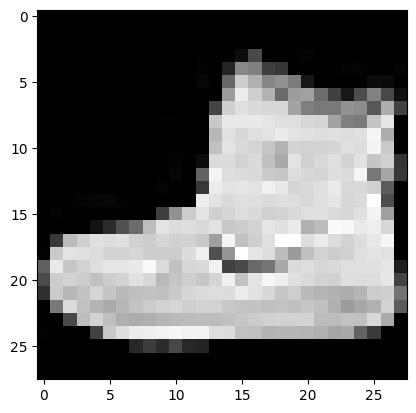

In [37]:
plt.imshow(image.squeeze(), cmap='gray')

In [38]:
rand_image_tensor = torch.randn(1,28,28).unsqueeze(0).to(device)
rand_image_tensor.shape


torch.Size([1, 1, 28, 28])

In [39]:
#Pass image through model
model_2(rand_image_tensor)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [40]:
torch.manual_seed(42)

#Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image:\n {test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [41]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

#pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

In [42]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [43]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass data through the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f'Shape after going through conv_layer: {test_image_through_conv.shape}')

#Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'shape after going through conv_layer and max pool layer: {test_image_through_conv_and_max_pool.shape}')

Shape after going through conv_layer: torch.Size([1, 10, 62, 62])
shape after going through conv_layer and max pool layer: torch.Size([1, 10, 31, 31])


In [44]:
torch.manual_seed(42)
#Create a random tensor with similar number of dimensoions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f'\random tensor:\n {random_tensor} ')
print(f'Random tensor shape: {random_tensor.shape}')

#Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax pool tensor:\n {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')

andom tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]) 
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [45]:
#Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [46]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_on_model_2 = timer()

#Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-----')
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_model_2,
                                            end=train_time_end_on_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.64302 | Train acc: 76.43%
Test loss: 0.68500 | Test acc: 75.02%

Epoch: 1
-----
Train loss: 0.64302 | Train acc: 76.43%
Test loss: 0.68500 | Test acc: 75.02%

Epoch: 2
-----
Train loss: 0.64302 | Train acc: 76.43%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 28.654 seconds


In [47]:
#Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023064136505127,
 'model_acc': 9.994009584664537}

In [48]:
print(model_0_results)
print(model_1_results)
print(model_2_results) #Their has to be an issue somewhere cause their is no way

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4766389727592468, 'model_acc': 83.42651757188499}
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6850008964538574, 'model_acc': 75.01996805111821}
{'model_name': 'FashionMNISTModelV2', 'model_loss': 2.3023064136505127, 'model_acc': 9.994009584664537}


In [49]:
#Visualize, visualize, visualize
def make_predictions(model:torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs_list = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)

      #Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      #Get prediction probabiltiy
      pred_probs = torch.softmax(pred_logit.squeeze(), dim=0)

      #Get pred_prob off the GPU for further calculations
      pred_probs_list.append(pred_probs.cpu())

  #Stack the pred_probs tor turn list into a tensor
  return torch.stack(pred_probs_list)

In [73]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

#View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

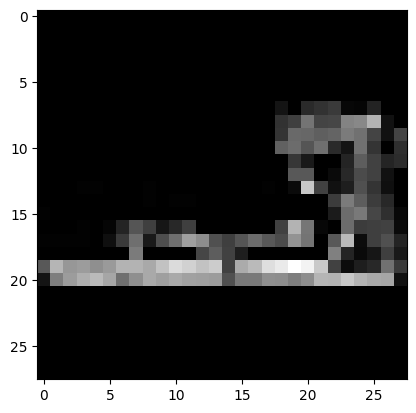

In [74]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')

In [75]:
#Make predictions
pred_probs = make_predictions(model=model_0,
                              data=test_samples
                            )

#View first two prediction probabilites
pred_probs[:2]

tensor([[2.5309e-03, 3.7018e-04, 1.5432e-03, 3.3426e-03, 1.4596e-03, 8.5137e-01,
         4.9618e-03, 4.5461e-02, 6.7298e-02, 2.1661e-02],
        [2.4123e-09, 3.5351e-10, 1.6295e-09, 8.3093e-10, 5.5606e-10, 7.9952e-05,
         1.1785e-08, 1.1562e-02, 5.0337e-05, 9.8831e-01]])

In [76]:
#Convert predicton probabilites to labesl
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 9, 0, 4, 6, 9, 9, 0, 4])

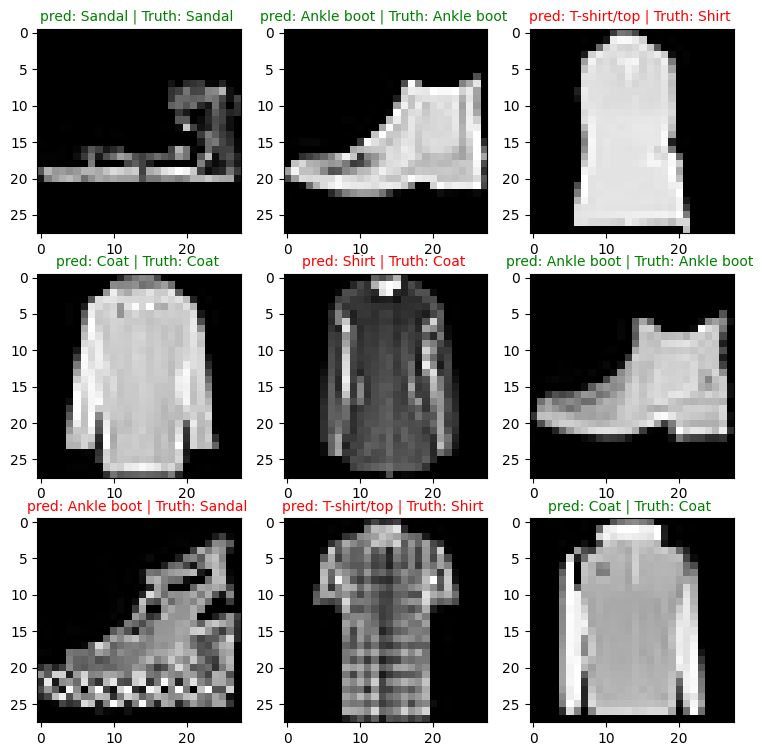

In [77]:
#Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  #Create subplot
  plt.subplot(nrows, ncols, i+1)

  #Plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  #Find the prediction (in text form e.g 'sandal')
  pred_label = class_names[pred_classes[i]]

  #Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  #Create a title for the plot
  title_text = f'pred: {pred_label} | Truth: {truth_label} '

  #Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

In [78]:
#Import tqdm.auto
from tqdm.auto import tqdm

#Make predictions with a trainded model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Making predictions....'):
    #Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    #Forward pass
    y_logit = model_2(X)
    #Turn prediction from logits
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    #Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

#Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 4,  ..., 9, 4, 3])

In [79]:
len(y_pred_tensor)

10000

In [80]:
#See if required packages are installed and if not,install them
try:
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__ }')
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')

mlxtend version: 0.23.4


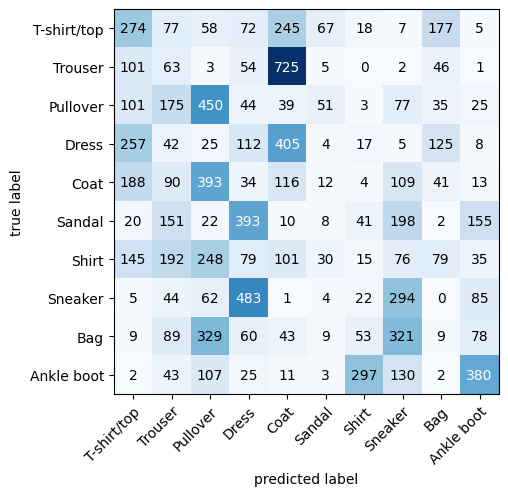

In [83]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

#Pot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), #matplotlib works with numpy
    class_names=class_names,
    figsize=(8, 5)
)

In [85]:
from pathlib import Path

#Create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#Create model save
MODEL_NAME = '03_pytorch_computer_vision_model_2.path'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.path


In [86]:
#Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))
#Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [87]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023064136505127,
 'model_acc': 9.994009584664537}

In [88]:
#Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023064136505127,
 'model_acc': 9.994009584664537}